### Paso 1. Cargar dataset con los clusters asignados

* __train_test_split__ divide los datos en entrenamiento y prueba.

* __LinearRegression__ y __RandomForestRegressor__ son los modelos a comparar.

* __mean_squared_error__ y __r2_score__ son métricas para evaluar los resultados.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para modelos y evaluación
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Cargar el dataset que ya incluye los clusters
dataset = pd.read_csv("dataset_con_clusters.csv")
print(dataset.columns)


Index(['id', 'Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM',
       'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Workout_Cardio', 'Workout_HIIT', 'Workout_Strength', 'Workout_Yoga',
       'cluster'],
      dtype='object')


Este dataset es igual que el anterior, pero incluye una columna con el número de cluster (0 a 4) asignado a cada sesión. Esa columna se generó con KMeans y representa el grupo al que pertenece cada sesión de entrenamiento, según características físicas.

### Paso 2: Separar variables predictoras (X) y variable objetivo (y)


In [45]:
# Variable objetivo: lo que queremos predecir
y = dataset['Calories_Burned']

# Variables predictoras: todas excepto lo que no aporta al modelo
X = dataset.drop(columns=['Calories_Burned', 'id'])  # 'id' no tiene valor predictivo


* y es la columna que queremos predecir: las calorías quemadas.

* X contiene el resto de variables, incluyendo cluster, ya que lo usaremos como una característica más del modelo.

### Paso 3: Dividir en conjunto de entrenamiento y prueba

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Paso 4: Entrenar modelos de predicción

##### __Modelo 1: Regresión Lineal__
La regresión lineal es un modelo base fácil de interpretar.

In [47]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

##### __Modelo 2: Random Forest (árboles de decisión)__
Random Forest captura relaciones no lineales y suele tener mejor rendimiento en la práctica.

In [48]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

##### __Modelo 3: Gradient Boosting__
Modelo más avanzado, basado en ensambles


In [49]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

In [50]:
from sklearn.neighbors import KNeighborsRegressor
# Modelo 4: K-Nearest Neighbors (opcional)
knn = KNeighborsRegressor(n_neighbors=5)  # Puedes ajustar el número de vecinos
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

### Paso 5: Evaluar los modelos

In [51]:
print("\nR² Score: mide qué tanto del valor de y se puede explicar con X (ideal cercano a 1).\nRMSE: mide el error promedio entre las predicciones y los valores reales (más bajo = mejor).")

def evaluar_modelo(nombre, y_test, y_pred):
    print(f"\n🔎 Resultados para {nombre}:")
    print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

evaluar_modelo("Regresión Lineal", y_test, y_pred_lr)
evaluar_modelo("Random Forest", y_test, y_pred_rf)
evaluar_modelo("Gradient Boosting", y_test, y_pred_gbr)
evaluar_modelo("K-Nearest Neighbors", y_test, y_pred_knn)



R² Score: mide qué tanto del valor de y se puede explicar con X (ideal cercano a 1).
RMSE: mide el error promedio entre las predicciones y los valores reales (más bajo = mejor).

🔎 Resultados para Regresión Lineal:
R² Score: 0.9808
RMSE: 40.05

🔎 Resultados para Random Forest:
R² Score: 0.9732
RMSE: 47.27

🔎 Resultados para Gradient Boosting:
R² Score: 0.9943
RMSE: 21.76

🔎 Resultados para K-Nearest Neighbors:
R² Score: 0.3985
RMSE: 224.02


### Paso 6: Visualizar predicciones frente a valores reales
Este gráfico te ayuda a ver si las predicciones del modelo están cerca de los valores reales. La línea roja representa una predicción perfecta.

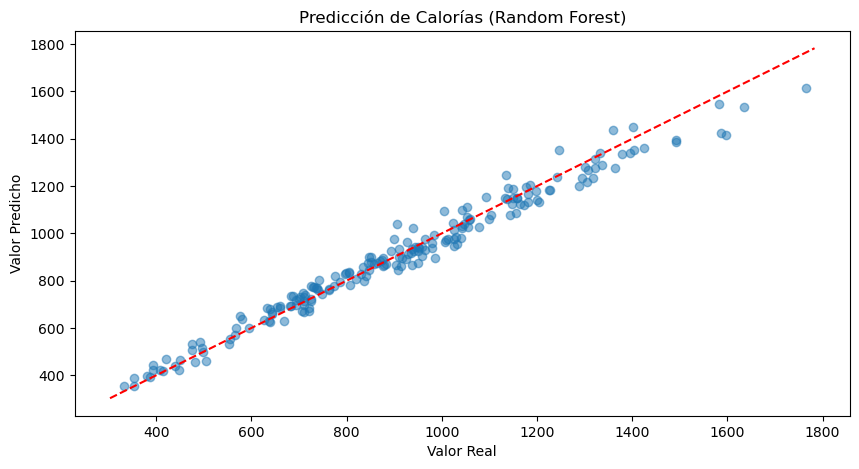

In [52]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Predicción de Calorías (Random Forest)')
plt.show()


🔵 Observación del gráfico:

Los puntos (predicciones) se agrupan en torno a la línea roja (predicción perfecta), lo cual indica que el modelo tiene buen rendimiento.

Sin embargo, hay cierta dispersión notable, especialmente en las predicciones de calorías más altas (zona superior derecha del gráfico), lo que puede indicar que el modelo tiene más dificultad en ese rango.

📌 Interpretación:

El Random Forest es robusto, pero puede sobreajustar o tener predicciones ligeramente menos estables para valores extremos.

Precisión buena, pero con margen de mejora si se busca mayor ajuste.

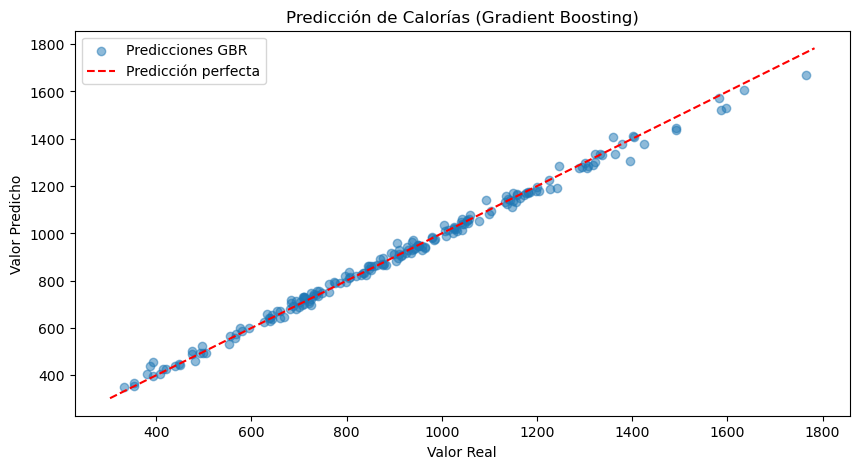

In [53]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_gbr, alpha=0.5, label='Predicciones GBR')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Predicción perfecta')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Predicción de Calorías (Gradient Boosting)')
plt.legend()
plt.show()


🔵 Observación del gráfico:

Los puntos están mucho más alineados con la línea roja.

Hay poca dispersión, incluso en valores altos o bajos, lo que indica que el modelo predice con gran precisión.

📌 Interpretación:

Gradient Boosting ha ofrecido un rendimiento superior.

Aprende de los errores anteriores (a través de árboles secuenciales) y, por tanto, tiende a mejorar progresivamente la precisión.

Es ideal cuando se busca máxima precisión.